In [15]:
pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
df = pd.read_csv('D:/Projects/Credit Card Fraud Detection/creditcard.csv/creditcard.csv')
print(df[df['V11'].isnull()])

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [4]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sqlalchemy import create_engine

# Trusted connection (Windows auth)
engine = create_engine(
    'mssql+pyodbc://DESKTOP-09SLK3B\SQLEXPRESS/CreditCardData?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)

df = pd.read_sql("SELECT * FROM dbo.creditcard", engine)

print("Shape:", df.shape)
print(df.head())


Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Connect to SQL Server
engine = create_engine(
    'mssql+pyodbc://DESKTOP-09SLK3B\SQLEXPRESS/CreditCardData?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)

# Load the data
df = pd.read_sql("SELECT * FROM dbo.creditcard", engine)

# === Validation Functions ===
def check_row_count(df, expected=284807):
    assert len(df) == expected, f"Row count mismatch: {len(df)} != {expected}"
    print(f"✅ Row count OK: {len(df)} rows")

def check_fraud_count(df, expected=492):
    frauds = df['Class'].sum()
    assert frauds == expected, f"Fraud count mismatch: {frauds} != {expected}"
    print(f"✅ Fraud count OK: {frauds} fraud cases")

def check_no_nans(df):
    nulls = df.isnull().sum().sum()
    assert nulls == 0, f"Found {nulls} NaN values"
    print("✅ No missing values in dataset")

def check_ranges(df):
    assert (df['Amount'] >= 0).all(), "Negative amounts found"
    assert set(df['Class'].unique()).issubset({0,1}), "Invalid Class values detected"
    print("✅ Value ranges OK (Amount >= 0, Class in {0,1})")

def check_duplicates(df):
    dups = df.duplicated().sum()
    print(f"ℹ️ Duplicate rows: {dups}")

# === Run All Checks ===
check_row_count(df)
check_fraud_count(df)
check_no_nans(df)
check_ranges(df)
check_duplicates(df)


✅ Row count OK: 284807 rows
✅ Fraud count OK: 492 fraud cases
✅ No missing values in dataset
✅ Value ranges OK (Amount >= 0, Class in {0,1})
ℹ️ Duplicate rows: 1081


In [4]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows")

Removed 1081 duplicate rows


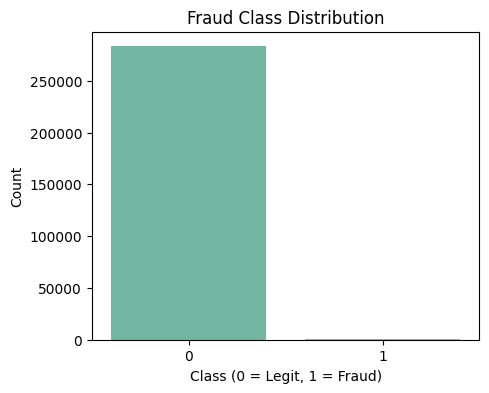

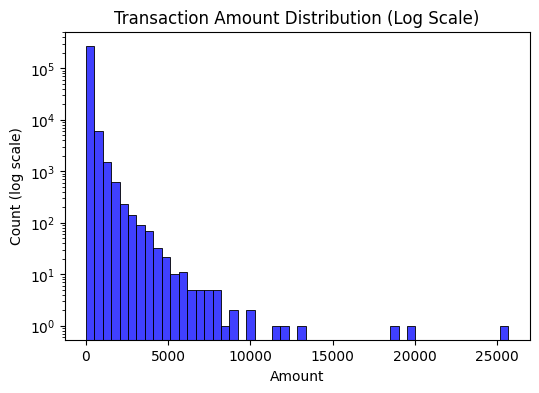

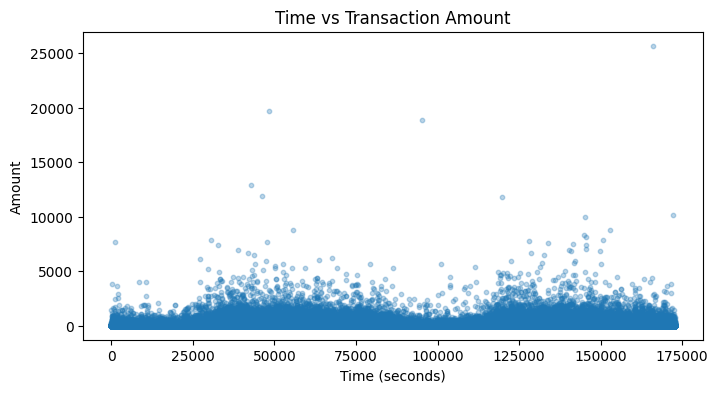

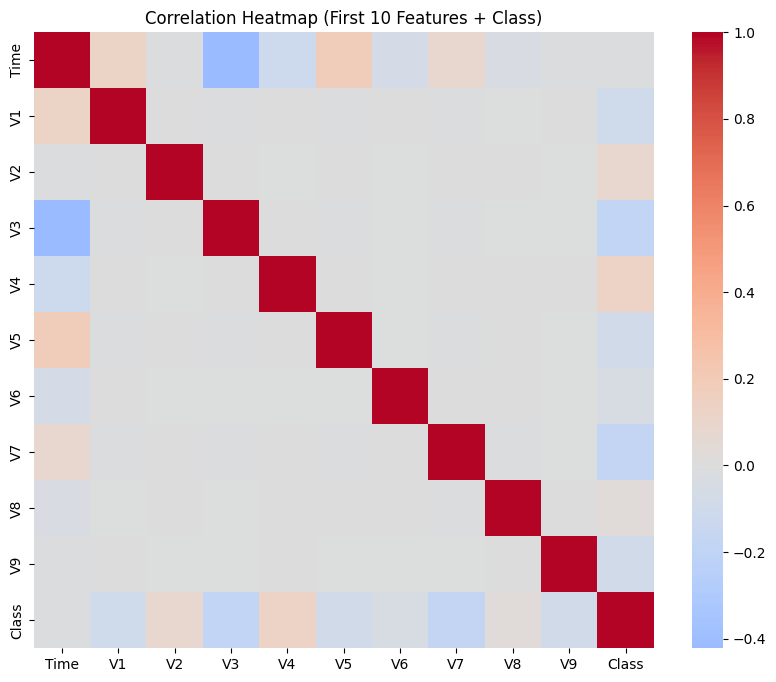

✅ Sanity plots saved in /sanity_plots folder


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder if not exists
os.makedirs("sanity_plots", exist_ok=True)

# Fraud class distribution
# Fraud class distribution (fixed palette warning)
plt.figure(figsize=(5, 4))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2', legend=False)
plt.title('Fraud Class Distribution')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.savefig("sanity_plots/fraud_class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Transaction amount distribution (log scale)
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=50, kde=False, color='blue')
plt.yscale('log')
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Count (log scale)')
plt.savefig("sanity_plots/transaction_amount_distribution_log.png", dpi=300, bbox_inches='tight')
plt.show()

# Time vs Amount scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df['Time'], df['Amount'], alpha=0.3, s=10)
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.savefig("sanity_plots/time_vs_amount.png", dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap (first 10 features + Class)
plt.figure(figsize=(10, 8))
corr = df.iloc[:, :10].join(df['Class']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (First 10 Features + Class)')
plt.savefig("sanity_plots/correlation_heatmap_first10.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Sanity plots saved in /sanity_plots folder")


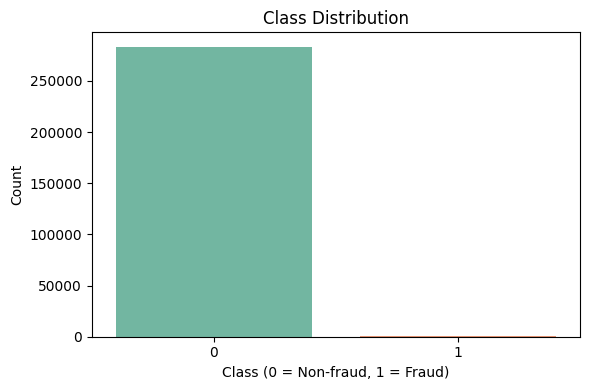

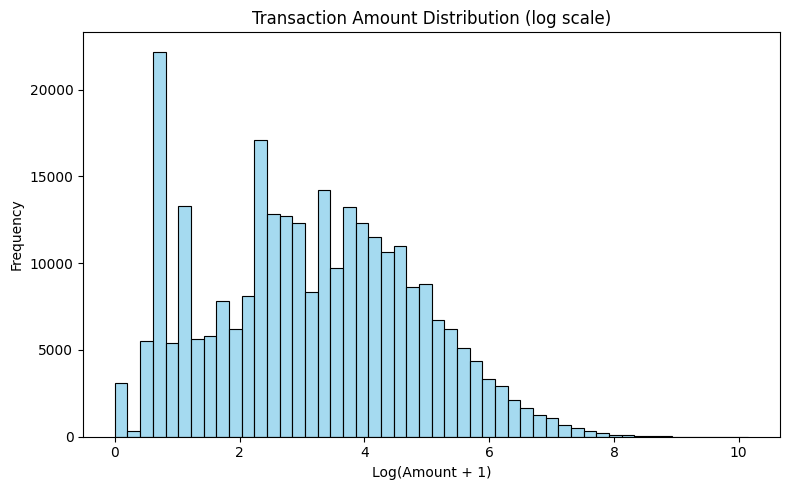

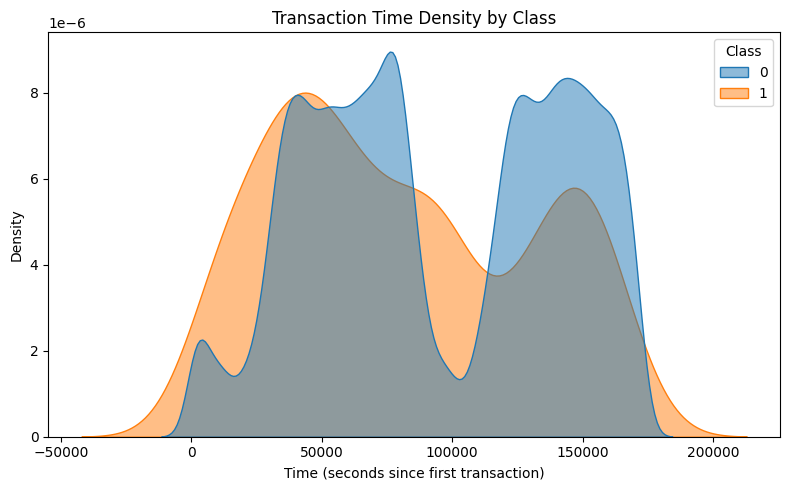

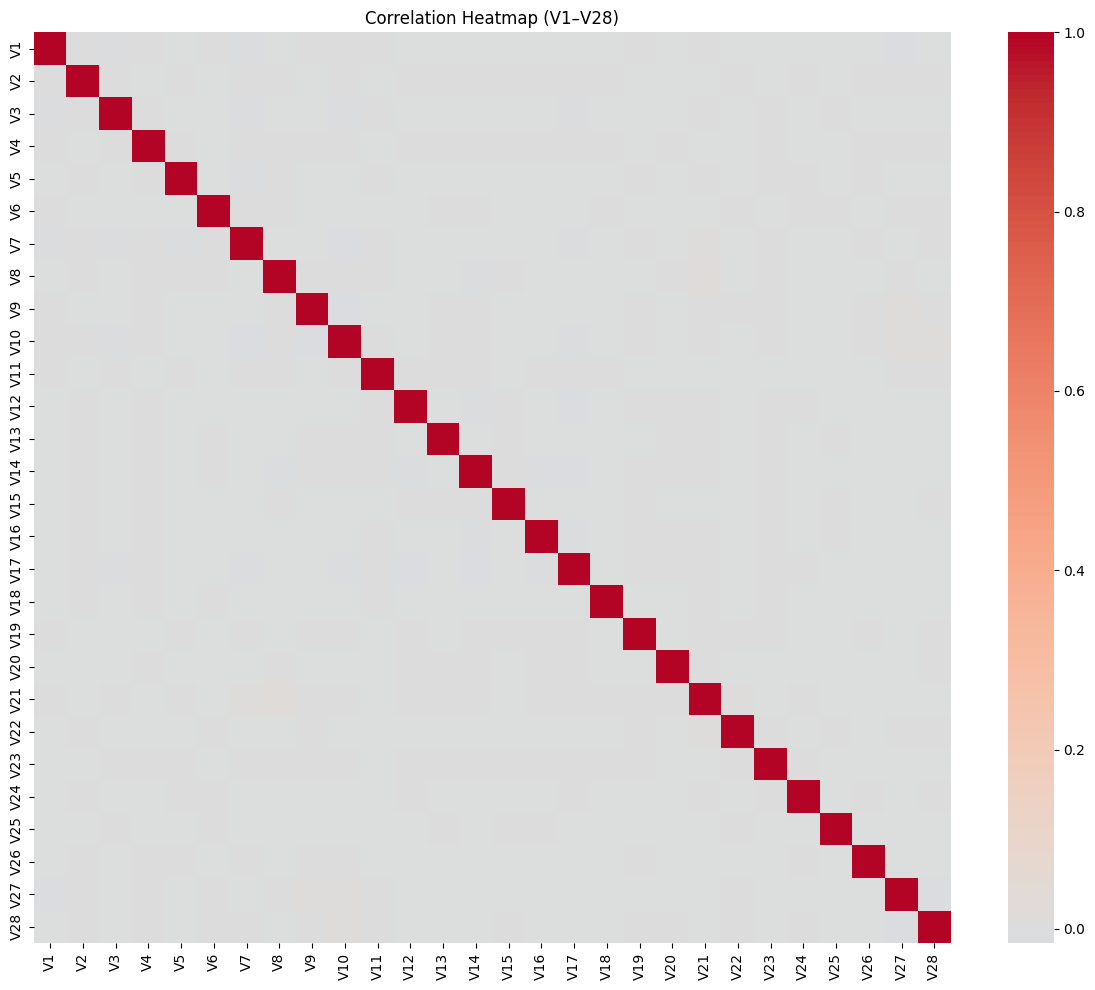

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create output folder
output_dir = "eda_plots"
os.makedirs(output_dir, exist_ok=True)

# Class balance bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2', legend=False)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "class_distribution.png"))
plt.show()

# Amount histogram (log scale)
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'].apply(np.log1p), bins=50, color='skyblue', edgecolor='black')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "amount_distribution_log.png"))
plt.show()

# Time vs Class scatter
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Time", hue="Class", fill=True, common_norm=False, alpha=0.5)
plt.title("Transaction Time Density by Class")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "time_vs_class_density.png"))
plt.show()

# Correlation heatmap for V1–V28
plt.figure(figsize=(12,10))
corr = df.drop(columns=["Time", "Amount", "Class"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (V1–V28)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.show()

#print(f"Baseline PR-AUC (predict all non-fraud): {ap_baseline:.4f}")
#print(f"Fraud ratio in data: {df['Class'].mean():.6f}")


In [7]:
# --- 6. PR-AUC Baseline (predict all zeros and random model) ---
from sklearn.metrics import average_precision_score
import numpy as np

y_true = df['Class'].values

# Predict all zeros (all non-fraud)
y_pred_all_zero = np.zeros_like(y_true)
ap_baseline = average_precision_score(y_true, y_pred_all_zero)
print(f"Baseline PR-AUC (predict all non-fraud): {ap_baseline:.4f}")

# Trivial random model (predict random probabilities)
np.random.seed(42)
y_pred_random = np.random.uniform(0, 1, size=len(y_true))
ap_random = average_precision_score(y_true, y_pred_random)
print(f"Random model PR-AUC: {ap_random:.4f}")

print(f"Fraud ratio in data: {df['Class'].mean():.6f}")


Baseline PR-AUC (predict all non-fraud): 0.0017
Random model PR-AUC: 0.0018
Fraud ratio in data: 0.001667


In [8]:
df.to_csv("creditcard_cleaned.csv", index=False)


In [9]:
import numpy as np

# Get cut-off point around 1 day (~ 24h)
t_cut = df["Time"].quantile(0.5)   # median splits ~half-half (Day 1 vs Day 2)

train = df[df["Time"] < t_cut].copy()
test  = df[df["Time"] >= t_cut].copy()

print(f"Time-based split:")
print(f"Train size: {len(train)} ({train['Class'].sum()} fraud cases)")
print(f"Test size: {len(test)} ({test['Class'].sum()} fraud cases)")


Time-based split:
Train size: 141863 (262 fraud cases)
Test size: 141863 (211 fraud cases)


In [9]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



=== LogReg_balanced ===
PR-AUC: 0.7718, ROC-AUC: 0.9550
              precision    recall  f1-score   support

           0     0.9998    0.9153    0.9557    141652
           1     0.0156    0.9005    0.0306       211

    accuracy                         0.9152    141863
   macro avg     0.5077    0.9079    0.4932    141863
weighted avg     0.9984    0.9152    0.9543    141863


=== RandomForest ===
PR-AUC: 0.7844, ROC-AUC: 0.9711
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998    141652
           1     0.9329    0.7251    0.8160       211

    accuracy                         0.9995    141863
   macro avg     0.9663    0.8625    0.9079    141863
weighted avg     0.9995    0.9995    0.9995    141863

[LightGBM] [Info] Number of positive: 262, number of negative: 141601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Li

c:\Users\saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


=== Summary of All Models ===
                 PR-AUC  ROC-AUC  Precision  Recall      F1
LogReg_balanced  0.7718   0.9550     0.0156  0.9005  0.0306
RandomForest     0.7844   0.9711     0.9329  0.7251  0.8160
LightGBM         0.7566   0.9698     0.7240  0.7583  0.7407
IsolationForest  0.0759   0.9502     0.1967  0.1137  0.1441
OneClassSVM      0.0012   0.4090     0.0015  1.0000  0.0030


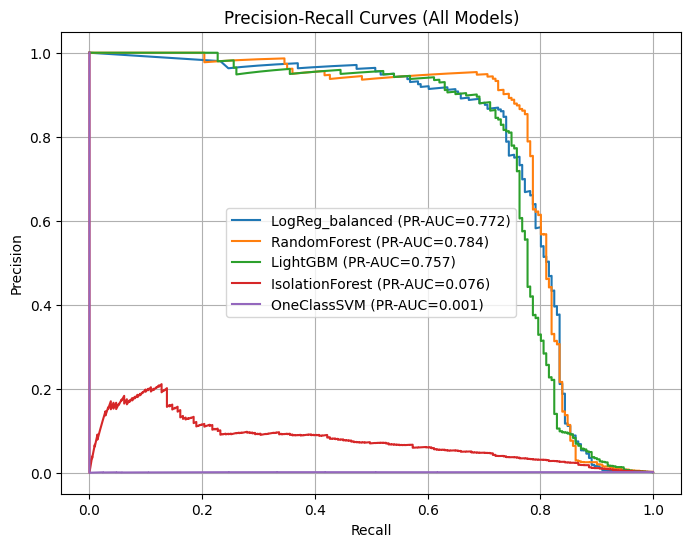

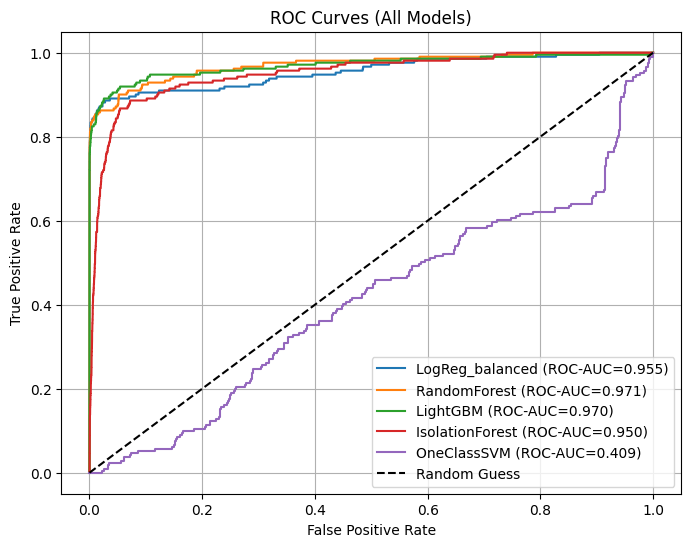

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve, roc_auc_score
import lightgbm as lgb

# -------------------------
# Step 6: Preprocessing Factory + Pipeline Constructor
# -------------------------
def make_column_transformer(X):
    """Factory for preprocessing transformer"""
    num_features = X.select_dtypes(include=np.number).columns.tolist()
    return ColumnTransformer(
        transformers=[("num", StandardScaler(), num_features)],
        remainder="drop"
    )

def make_pipeline(model, X):
    """Full pipeline with preprocessing + model"""
    return Pipeline([
        ("preprocess", make_column_transformer(X)),
        ("model", model)
    ])

# -------------------------
# Step 7: Modeling + Evaluation
# -------------------------
results = {}
pr_curves = {}
roc_curves = {}

def evaluate_model(name, y_true, y_pred, y_scores):
    """Print + store results"""
    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    print(f"\n=== {name} ===")
    print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_true, y_pred, digits=4))

    # Save metrics
    results[name] = {
        "PR-AUC": pr_auc,
        "ROC-AUC": roc_auc,
        "Precision": classification_report(y_true, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_true, y_pred, output_dict=True)["1"]["recall"],
        "F1": classification_report(y_true, y_pred, output_dict=True)["1"]["f1-score"]
    }
    pr_curves[name] = (precision, recall)
    roc_curves[name] = (fpr, tpr)

# -------------------------
# Supervised Comparable Pipelines
# -------------------------
supervised_models = {
    "LogReg_balanced": LogisticRegression(class_weight="balanced", max_iter=1000),
    "RandomForest": RandomForestClassifier(
        n_estimators=200, max_depth=10, class_weight="balanced", n_jobs=-1, random_state=42
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=300, num_leaves=32, learning_rate=0.05,
        class_weight="balanced", n_jobs=-1, random_state=42
    )
}

for name, model in supervised_models.items():
    pipe = make_pipeline(model, train.drop(columns=["Class"]))
    pipe.fit(train.drop(columns=["Class"]), train["Class"])
    y_pred = pipe.predict(test.drop(columns=["Class"]))
    y_scores = pipe.predict_proba(test.drop(columns=["Class"]))[:, 1]
    evaluate_model(name, test["Class"], y_pred, y_scores)

# -------------------------
# Anomaly Detection Baselines
# -------------------------
anomaly_models = {
    "IsolationForest": IsolationForest(contamination=0.001, random_state=42),
    "OneClassSVM": OneClassSVM(kernel="rbf", nu=0.001, gamma="scale")
}

for name, model in anomaly_models.items():
    model.fit(train.drop(columns=["Class"]))
    pred_labels = model.predict(test.drop(columns=["Class"]))
    y_pred = np.where(pred_labels == -1, 1, 0)
    if hasattr(model, "decision_function"):
        y_scores = -model.decision_function(test.drop(columns=["Class"]))
    else:
        y_scores = -model.score_samples(test.drop(columns=["Class"]))
    evaluate_model(name, test["Class"], y_pred, y_scores)

# -------------------------
# Final Summary Table
# -------------------------
summary_df = pd.DataFrame(results).T.round(4)
print("\n=== Summary of All Models ===")
print(summary_df)

# -------------------------
# Visual PR Curves
# -------------------------
plt.figure(figsize=(8, 6))
for name, (precision, recall) in pr_curves.items():
    plt.plot(recall, precision, label=f"{name} (PR-AUC={results[name]['PR-AUC']:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (All Models)")
plt.legend()
plt.grid(True)
plt.savefig("pr_curves.png", dpi=300, bbox_inches="tight")
plt.show()

# -------------------------
# Visual ROC Curves
# -------------------------
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (ROC-AUC={results[name]['ROC-AUC']:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (All Models)")
plt.legend()
plt.grid(True)
plt.savefig("roc_curves.png", dpi=300, bbox_inches="tight")
plt.show()
